In [1]:
import pandas as pd
import numpy as np

In [2]:
#2. Load the dataset into the tool.
data=pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


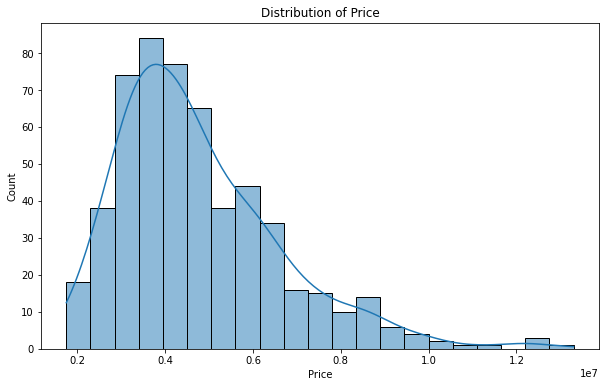

In [4]:
# Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

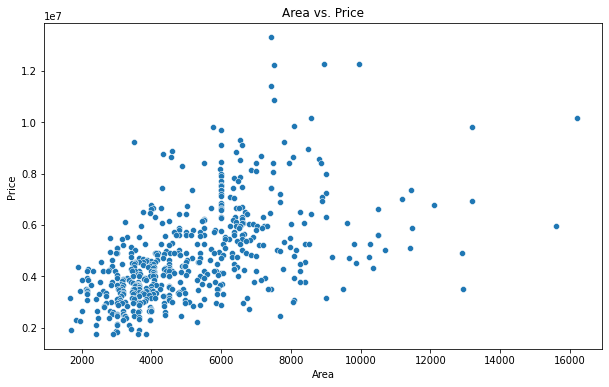

In [5]:
# Bivariate Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=data)
plt.title('Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


<Figure size 720x432 with 0 Axes>

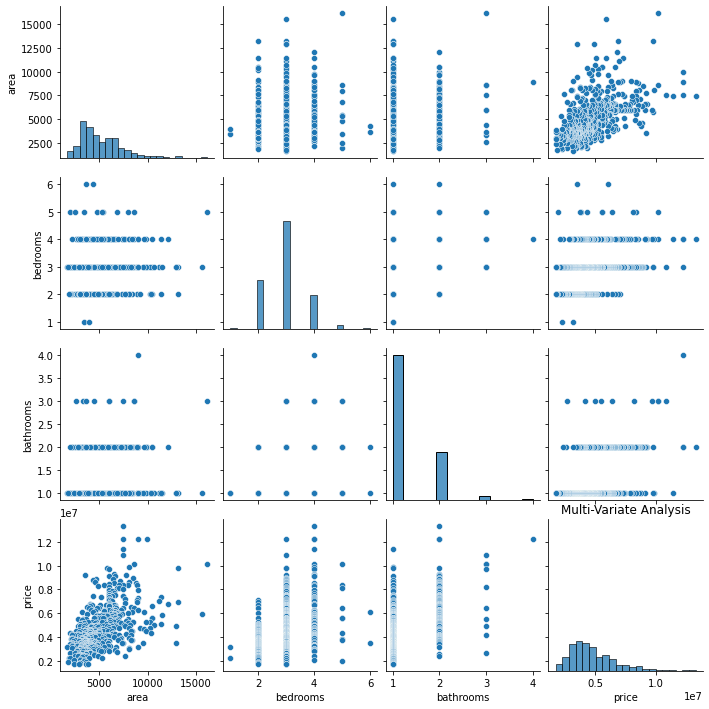

In [6]:
# Multi-Variate Analysis
# Example visualization
plt.figure(figsize=(10, 6))
sns.pairplot(data, vars=['area', 'bedrooms', 'bathrooms', 'price'])
plt.title('Multi-Variate Analysis')
plt.show()


In [7]:
# Perform descriptive statistics on the dataset
statistics = data.describe()
print(statistics)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [8]:
# Check for Missing values and deal with them.

# Check for missing values
missing_values = data.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [9]:
# Find the outliers and replace them outliers
from scipy import stats

# Find outliers using z-score
z_scores = stats.zscore(data['price'])
threshold = 3
outliers = data[(z_scores > threshold) | (z_scores < -threshold)]
print(outliers)

median = data['price'].median()
data['price'] = np.where((z_scores > threshold) | (z_scores < -threshold), median, data['price'])


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   
5  10850000  7500         3          3        1      yes        no      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  
5              no             yes        2   semi-furnished  


In [34]:
# Check for Categorical columns and perform encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

categorical_cols = ['furnishingstatus','mainroad','guestroom','basement','hotwaterheating','airconditioning']

# Encode categorical columns
encoded_data = pd.get_dummies(data, columns=categorical_cols)

encoded_data

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes
0,4340000.0,7420,4,2,3,2,1,0,0,0,1,1,0,1,0,1,0,0,1
1,4340000.0,8960,4,4,4,3,1,0,0,0,1,1,0,1,0,1,0,0,1
2,4340000.0,9960,3,2,2,2,0,1,0,0,1,1,0,0,1,1,0,1,0
3,4340000.0,7500,4,2,2,3,1,0,0,0,1,1,0,0,1,1,0,0,1
4,4340000.0,7420,4,1,2,2,1,0,0,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,2,0,0,1,0,1,1,0,0,1,1,0,1,0
541,1767150.0,2400,3,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0
542,1750000.0,3620,2,1,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0
543,1750000.0,2910,3,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0


In [35]:
# Split the data into dependent and independent variables. 
X = encoded_data.drop('price', axis=1)
y = encoded_data['price'] 

In [36]:
# Scale the independent variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [42]:
y_train.shape

(436,)

In [44]:
X_train.shape

(436, 18)

In [45]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Test the model
y_pred = model.predict(X_test)

In [48]:
y_pred

array([4200000., 6510000., 3850000., 4900000., 3290000., 3500000.,
       7070000., 5460000., 2940000., 2940000., 7700000., 3430000.,
       3115000., 3990000., 3430000., 4200000., 3640000., 2653000.,
       4795000., 3605000., 5810000., 4900000., 3430000., 4620000.,
       5803000., 6300000., 2450000., 3885000., 4760000., 3780000.,
       3640000., 3430000., 5460000., 3500000., 3500000., 4095000.,
       4620000., 6160000., 3115000., 3885000., 3500000., 2653000.,
       6510000., 4480000., 3500000., 2653000., 7560000., 3500000.,
       3500000., 3150000., 7700000., 3430000., 4270000., 3990000.,
       4200000., 2940000., 7420000., 3430000., 3500000., 3430000.,
       3150000., 2940000., 4760000., 4760000., 3500000., 4025000.,
       5950000., 3430000., 7700000., 3920000., 4200000., 4515000.,
       4270000., 6930000., 2653000., 9240000., 4060000., 4095000.,
       7070000., 3115000., 4340000., 4403000., 4340000., 4795000.,
       3430000., 5390000., 3430000., 3500000., 4340000., 49700

In [55]:
pred1 = model.predict(X_train)
pred1

array([ 7560000.,  6300000.,  3395000.,  3430000.,  3500000.,  4900000.,
        3500000.,  2940000.,  2940000.,  3500000.,  3703000.,  3500000.,
        4480000.,  3640000.,  4473000.,  5383000.,  2660000.,  5250000.,
        2940000.,  6790000.,  4340000.,  3850000.,  5810000.,  6090000.,
        5600000.,  3500000.,  2940000.,  3500000.,  5285000.,  3255000.,
        3850000.,  2275000.,  3570000.,  4900000.,  3430000.,  3500000.,
        2940000.,  8855000.,  4200000.,  7343000.,  5250000.,  4305000.,
        2450000.,  3850000.,  2450000.,  2835000.,  4795000.,  4340000.,
        3570000.,  7700000.,  3500000.,  3150000.,  4340000.,  3500000.,
        4200000.,  6475000.,  3710000.,  5285000.,  6300000.,  5950000.,
        4760000.,  4200000.,  4900000.,  7245000.,  4620000.,  8575000.,
        8960000.,  3500000.,  6930000.,  4613000.,  4620000.,  3850000.,
        3465000.,  7700000.,  5215000.,  5040000.,  4515000.,  8645000.,
        3780000.,  3850000.,  2450000.,  6300000., 

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [61]:
accuracy_score(y_train,pred1)

0.3623853211009174

In [62]:
accuracy_score(y_test,y_pred)

0.027522935779816515

In [65]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   1750000.0       0.00      0.00      0.00         1
   1820000.0       0.00      0.00      0.00         1
   1890000.0       0.00      0.00      0.00         2
   2100000.0       0.00      0.00      0.00         1
   2233000.0       0.00      0.00      0.00         1
   2275000.0       0.00      0.00      0.00         1
   2380000.0       0.00      0.00      0.00         1
   2450000.0       0.00      0.00      0.00         2
   2520000.0       0.00      0.00      0.00         1
   2653000.0       0.00      0.00      0.00         0
   2660000.0       0.00      0.00      0.00         4
   2800000.0       0.00      0.00      0.00         1
   2870000.0       0.00      0.00      0.00         1
   2940000.0       0.00      0.00      0.00         2
   3003000.0       0.00      0.00      0.00         1
   3010000.0       0.00      0.00      0.00         1
   3045000.0       0.00      0.00      0.00         1
   3080000.0       0.00    

C:\Users\athis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\athis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\athis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\athis\anaconda3\lib\site-packages\sklearn\metrics\_cla